In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

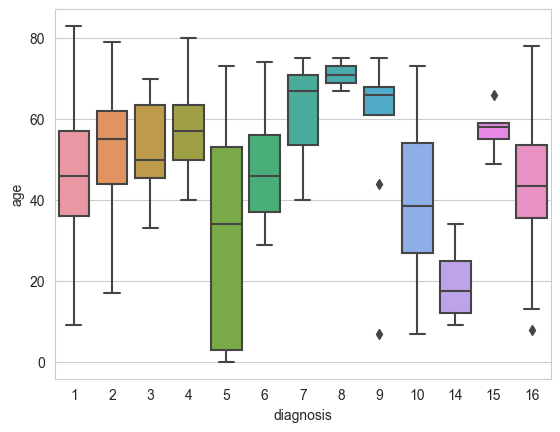

In [22]:
df = pd.read_csv('docs/data_arrhythmia.csv', delimiter=';', na_values='?')
sns.boxplot(x='diagnosis', y='age', data=df)

df = df[df['height'] <= 200]

id = [i for i in range(len(df))]
df['id'] = id

In [23]:
class_codes = [
    (245, '01'),
    (44, '02'),
    (15, '03'),
    (15, '04'),
    (13, '05'),
    (25, '06'),
    (3, '07'),
    (2, '08'),
    (9, '09'),
    (50, '10'),
    (0, '11'),
    (0, '12'),
    (0, '13'),
    (4, '14'),
    (5, '15'),
    (22, '16')
]

age_threshold = 50

# Create the truth column based on the age and diagnosis
df['truth'] = df.apply(
    lambda row: row['age'] > next((code[0] for code in class_codes if code[1] == row['diagnosis']), age_threshold),
    axis=1)

In [24]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,LA,LB,LC,LD,LE,LF,LG,diagnosis,id,truth
0,75,0,190,80,91,193,371,174,121,-16,...,-0.9,0.0,0,0.9,2.9,23.3,49.4,8,0,True
1,56,1,165,64,81,174,401,149,39,25,...,0.0,0.0,0,0.2,2.1,20.4,38.8,6,1,True
2,54,0,172,95,138,163,386,185,102,96,...,-2.4,0.0,0,0.3,3.4,12.3,49.0,10,2,True
3,55,0,175,94,100,202,380,179,143,28,...,-2.2,0.0,0,0.4,2.6,34.6,61.6,1,3,True
4,75,0,190,80,88,181,360,177,103,-16,...,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1,445,True
448,37,0,190,85,100,137,361,201,73,86,...,-1.6,0.0,0,0.4,2.4,38.0,62.4,10,446,False
449,36,0,166,68,108,176,365,194,116,-85,...,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2,447,False
450,32,1,155,55,93,106,386,218,63,54,...,-0.7,0.0,0,0.5,2.4,25.0,46.6,1,448,False


In [25]:
df.shape

(450, 282)

In [26]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis', 'id'],
      dtype='object', length=281)

In [27]:
numeric_features.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8,0
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10,2
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1,3
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7,4


### Preprocessing Data

In [28]:
qr_feature = [feature for feature in numeric_features if 'qr' in feature or 'QR' in feature]
qr_feature

['qrs_duration', 'qrs', 'QRST']

In [29]:
for feature in qr_feature:
    print(feature, df[feature].unique())

qrs_duration [ 91  81 138 100  88  77  78  84  89 102  75  82  70  83  90  71 109  94
  95  96  85  69 103  80  79  92  86  73  76  87 101  93 163 114 170 137
  72  97  98 106  74  99 111  63 113  68 110 108 153  62 146  67 105  61
 104 132 131 121 123 107 118 188 147 185 140  55 133]
qrs [ -16   25   96   28  107   77   67   61   85   72   12  -24   68   46
   36   57   73  -12   50   81   62    4   52  -34   90   10   -8  -37
  -52   13   38    9   49   54   48   -2  -57   53   59  -18   18   30
   63  -14    1   34   11   64   58  -11   42  126   40   74   66   75
   56  -36   33   88  116   60   44  -55   82   14   27   -4  -13 -137
   19   24   22   26  -10  169   43   -1   37   41   78   55  -21   15
  -46   39   29   -5   84   71    7   91   23  -50   70   94   65  -51
   -7   51   79   80   20  -32  -40   76  -20  -58  -22   47  102   -6
  -15   16  111   86   35    3  -25    2   17  -19  -38  -63  -48    8
   87  -31  -29   69  -39  -26  -49    0  -44  155  -27   83   32   21


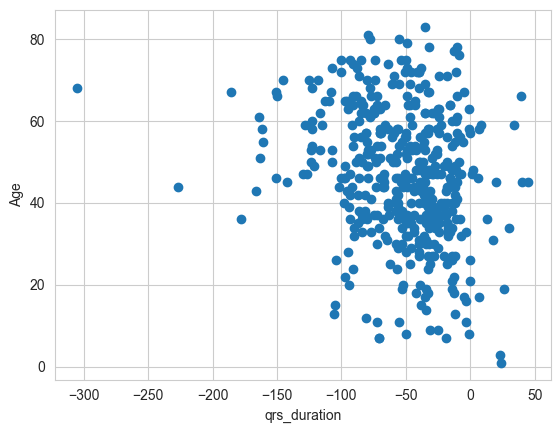

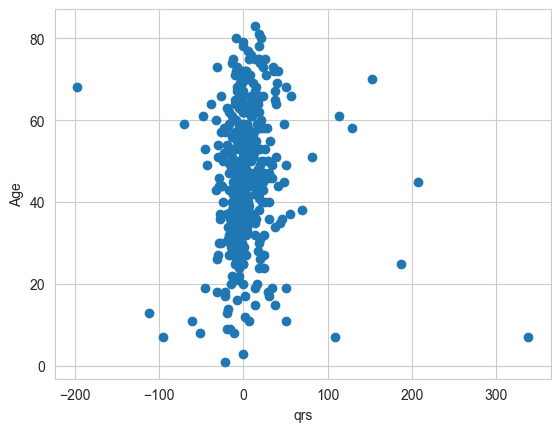

In [30]:
for feature in qr_feature:
    if feature != 'QRST':
        data = df.copy()
        data[feature] = data['QRST'] - data[feature]
        plt.scatter(data[feature], data['age'])
        plt.xlabel(feature)
        plt.ylabel('Age')
        plt.show()

### EDA
- Problem -> Data -> Analysis -> Model -> Conclusion

In [31]:
new_column = ['age', 'sex', 'height', 'weight', 'qrs_duration', 'qrs', 'heart_rate', 'diagnosis']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 451
Columns: 282 entries, age to truth
dtypes: bool(1), float64(121), int64(160)
memory usage: 991.8 KB


In [32]:
missing_data = pd.DataFrame({'total missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum() / 82790) * 100})
missing_data

,total missing,perc_missing
age,0,0.0
sex,0,0.0
height,0,0.0
weight,0,0.0
qrs_duration,0,0.0
...,...,...
LF,0,0.0
LG,0,0.0
diagnosis,0,0.0
id,0,0.0


In [33]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,46.675556,0.551111,163.842222,68.437778,88.942222,155.195556,367.797778,170.086667,90.035556,33.353333,...,9.067111,-1.441333,0.004000,0.0,0.513111,1.220667,19.432222,29.588222,3.875556,224.500000
std,16.214228,0.497934,10.412195,16.132715,15.394913,44.918555,32.260307,35.644734,25.834294,45.254362,...,3.468655,1.992218,0.050229,0.0,0.346322,1.427738,13.430692,18.453662,4.416267,130.048068
min,1.000000,0.000000,105.000000,10.000000,55.000000,0.000000,240.000000,108.000000,0.000000,-172.000000,...,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000,0.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.250000,...,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.500000,17.725000,1.000000,112.250000
50%,47.000000,1.000000,164.000000,68.000000,86.500000,157.000000,367.500000,162.000000,91.000000,40.000000,...,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.150000,28.100000,1.000000,224.500000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.875000,41.175000,6.000000,336.750000
max,83.000000,1.000000,190.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000,449.000000


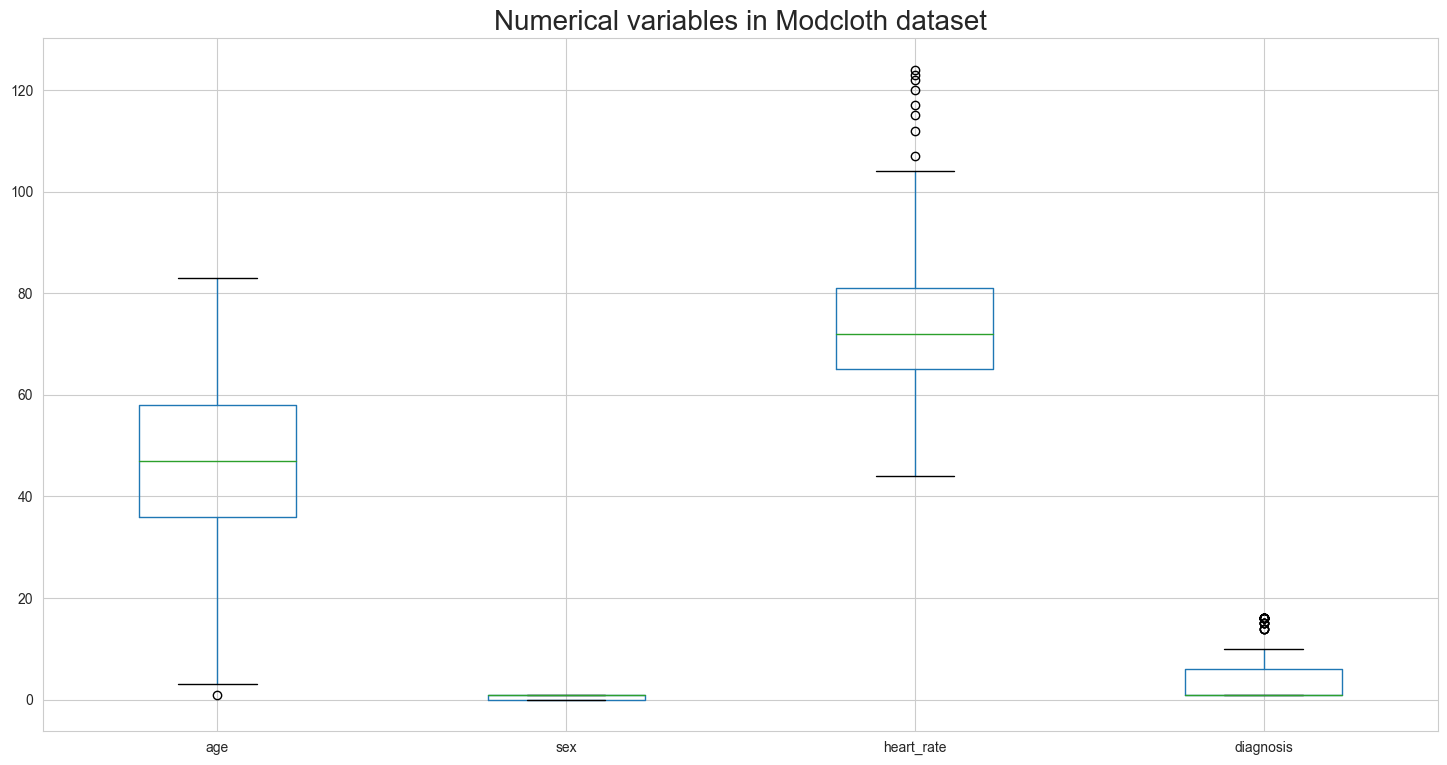

In [34]:
num_cols = ['age', 'sex', 'heart_rate', 'diagnosis']
plt.figure(figsize=(18, 9))
df[num_cols].boxplot()
plt.title('Numerical variables in Modcloth dataset', fontsize=20)
plt.show()

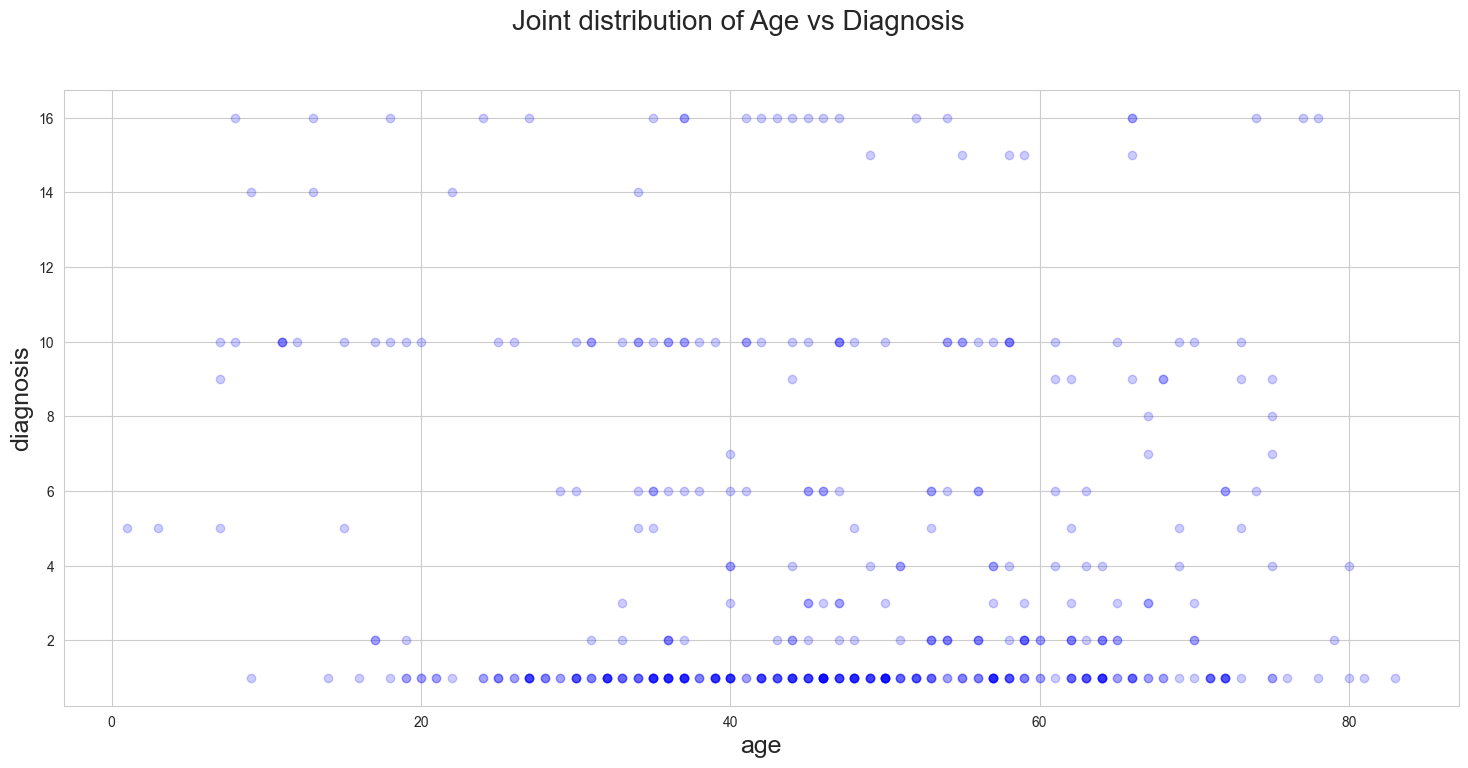

In [35]:
plt.figure(figsize=(18, 8))
plt.xlabel('age', fontsize=18)
plt.ylabel('diagnosis', fontsize=18)
plt.suptitle('Joint distribution of Age vs Diagnosis', fontsize=20)
plt.plot(df.age, df['diagnosis'], 'bo', alpha=0.2)
plt.show()

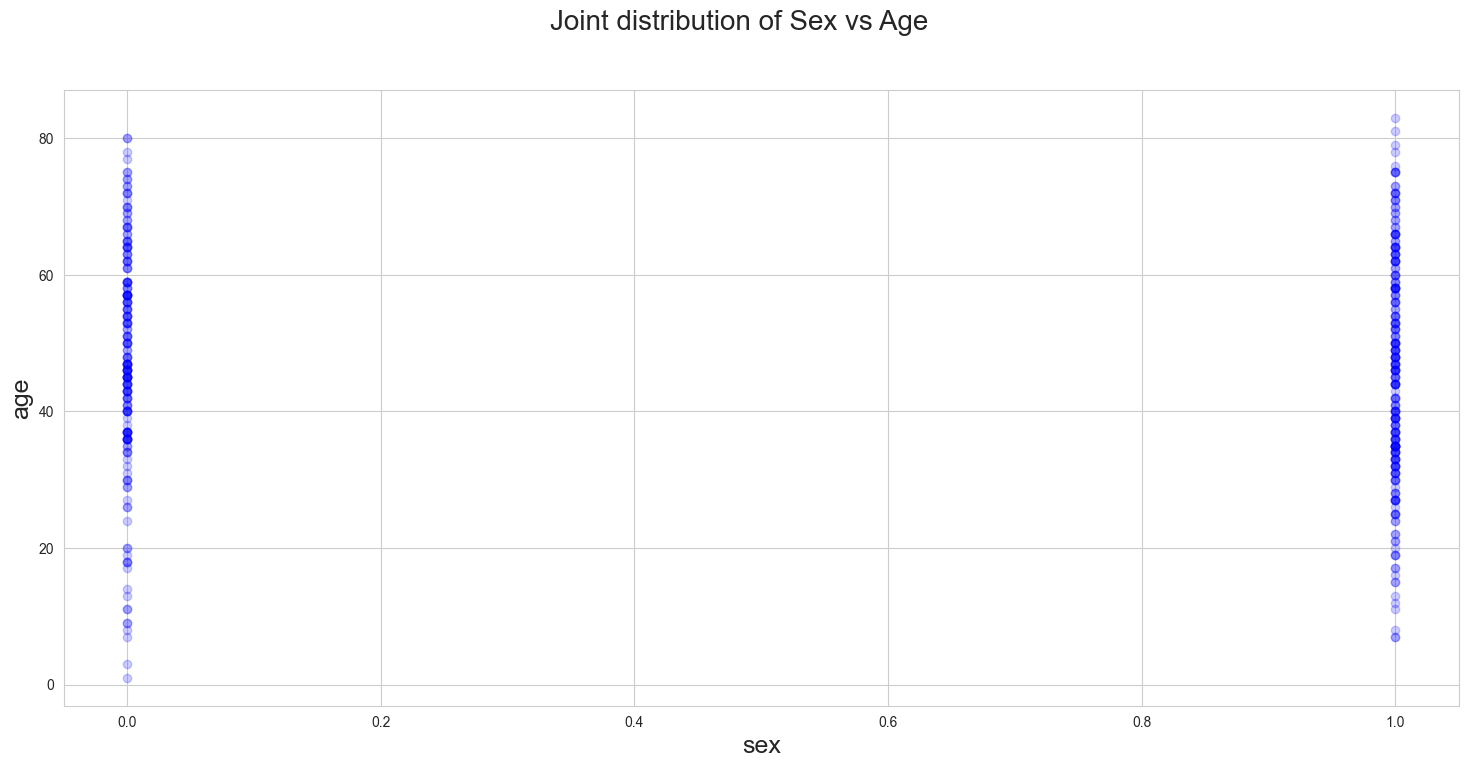

In [36]:
plt.figure(figsize=(18, 8))
plt.xlabel('sex', fontsize=18)
plt.ylabel('age', fontsize=18)
plt.suptitle('Joint distribution of Sex vs Age', fontsize=20)
plt.plot(df.sex, df['age'], 'bo', alpha=0.2)
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

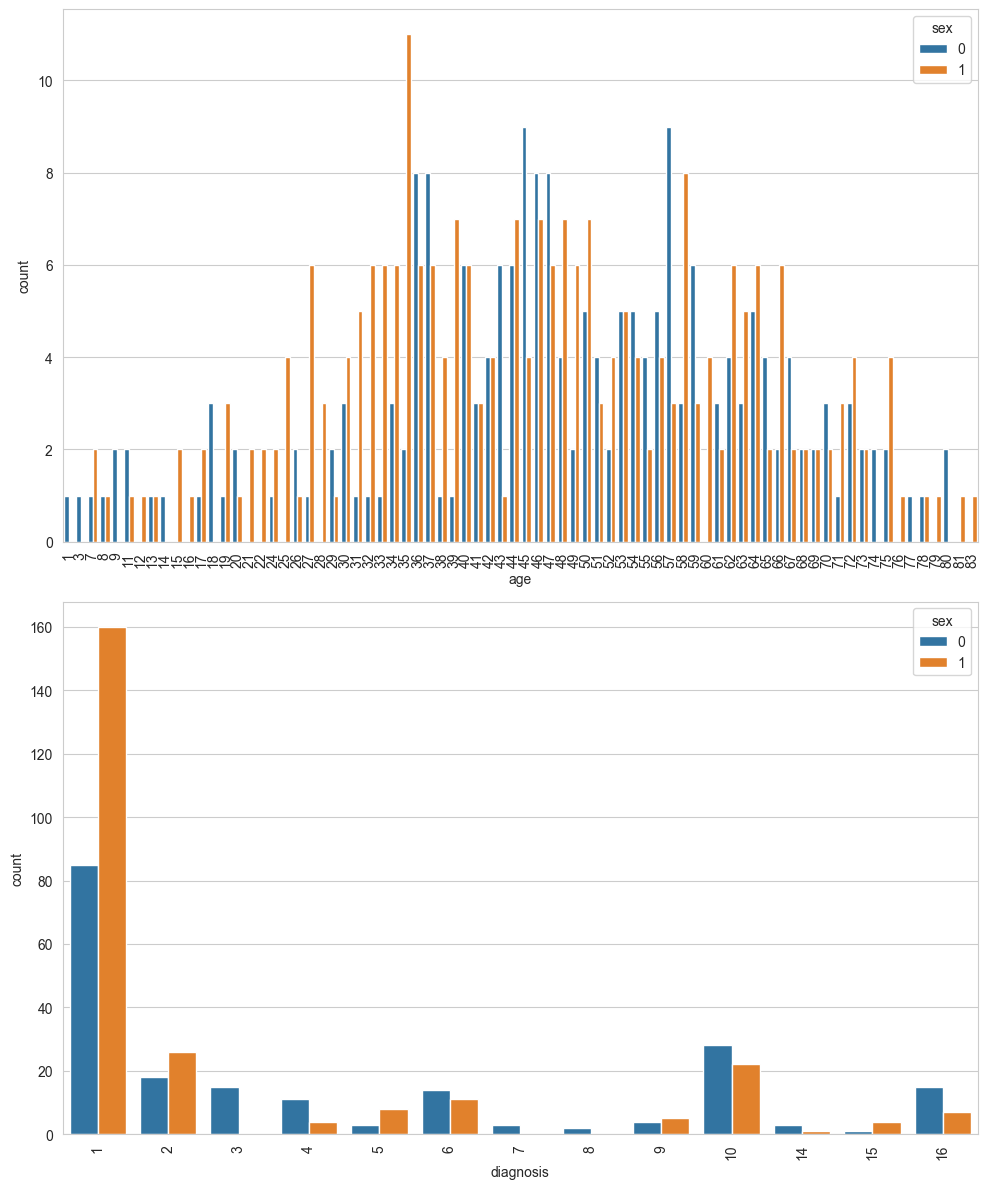

In [37]:
cat_var = ['age', 'diagnosis']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
axs = axs.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(x=var, hue='sex', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()
fig.delaxes(axs[2])
plt.show()

### Standardized Data
This is the normalization without DATATEST

In [38]:
def standardized(all_data, column_target):
    for column in column_target:
        all_data[column] = (all_data[column]) - ((all_data[column].mean()) / (all_data[column].std()))
    return all_data

In [39]:
test_start_id = len(df)
all_data = standardized(df, column_target=[cat_var])
std_train = all_data.iloc[:test_start_id]

### Split Truth

In [41]:
def splitTruth(dataTrain, columnTarget):
    truthData = []
    for truth in dataTrain[columnTarget].unique():
        truthData.append(dataTrain.where(dataTrain[columnTarget] == truth).dropna())
    return truthData


yesData, noData = splitTruth(df, columnTarget='sex')


In [42]:
yesData

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,LA,LB,LC,LD,LE,LF,LG,diagnosis,id,truth
2,51.121321,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,9.122436,2.0,True
8,41.121321,0.0,168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,0.122436,8.0,False
71,34.121321,0.0,182.0,90.0,101.0,294.0,356.0,164.0,143.0,33.0,...,0.0,0.0,0.0,0.2,1.9,22.0,38.3,15.122436,71.0,False
86,16.121321,0.0,165.0,50.0,96.0,151.0,373.0,147.0,102.0,68.0,...,-2.1,0.0,0.0,0.3,-2.2,32.4,3.4,1.122436,86.0,False
88,65.121321,0.0,161.0,70.0,170.0,192.0,419.0,264.0,116.0,62.0,...,-2.6,0.0,0.0,0.0,-3.3,46.7,2.5,8.122436,88.0,True
158,56.121321,0.0,161.0,70.0,83.0,194.0,393.0,169.0,97.0,40.0,...,0.0,0.0,0.0,0.4,1.3,34.8,43.6,0.122436,157.0,True
170,41.121321,0.0,178.0,89.0,106.0,183.0,380.0,147.0,94.0,-2.0,...,-1.3,0.0,0.0,0.5,0.8,17.9,24.1,0.122436,169.0,False
187,59.121321,0.0,170.0,85.0,110.0,157.0,426.0,198.0,94.0,62.0,...,-2.0,0.0,0.0,0.5,0.5,2.9,9.9,1.122436,186.0,True
207,59.121321,0.0,176.0,73.0,146.0,138.0,438.0,283.0,87.0,16.0,...,0.0,0.0,0.0,0.1,-1.6,67.9,45.2,8.122436,206.0,True
209,44.121321,0.0,176.0,95.0,80.0,168.0,368.0,184.0,93.0,73.0,...,-1.1,0.0,0.0,0.6,2.8,25.1,49.7,9.122436,208.0,False


In [43]:
noData

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,LA,LB,LC,LD,LE,LF,LG,diagnosis,id,truth
29,48.121321,1.0,160.0,83.0,96.0,147.0,400.0,301.0,82.0,-37.0,...,-3.9,0.0,0.0,0.5,-1.1,3.6,-6.3,1.122436,29.0,True
56,35.121321,1.0,160.0,63.0,79.0,0.0,376.0,165.0,0.0,34.0,...,0.0,0.0,0.0,0.0,1.5,26.2,37.0,0.122436,56.0,False
85,72.121321,1.0,159.0,59.0,163.0,147.0,431.0,242.0,97.0,56.0,...,0.0,0.0,0.0,0.1,-3.7,88.8,43.7,8.122436,85.0,True
89,70.121321,1.0,158.0,72.0,137.0,164.0,393.0,244.0,105.0,14.0,...,0.0,0.0,0.0,1.2,-1.5,45.0,27.0,8.122436,89.0,True
93,59.121321,1.0,165.0,70.0,72.0,169.0,328.0,135.0,85.0,-13.0,...,-1.2,0.0,0.0,0.5,0.7,6.0,10.7,4.122436,93.0,True
99,33.121321,1.0,160.0,70.0,78.0,118.0,241.0,152.0,68.0,26.0,...,0.0,0.0,0.0,0.5,-0.5,28.3,24.1,0.122436,99.0,False
112,30.121321,1.0,163.0,75.0,79.0,170.0,364.0,167.0,97.0,58.0,...,-1.6,0.0,0.0,0.5,1.3,14.4,26.6,0.122436,112.0,False
120,66.121321,1.0,154.0,59.0,74.0,159.0,380.0,154.0,96.0,15.0,...,0.0,0.0,0.0,0.7,1.8,28.8,41.0,0.122436,120.0,True
138,32.121321,1.0,162.0,68.0,80.0,156.0,364.0,134.0,116.0,60.0,...,-1.6,0.0,0.0,1.3,1.0,17.0,23.6,0.122436,138.0,False
175,51.121321,1.0,160.0,64.0,71.0,148.0,409.0,139.0,93.0,-5.0,...,-0.9,0.0,0.0,0.3,1.1,11.6,17.9,5.122436,174.0,True


### Find Data Mean

In [44]:
def find_mean(yesData, noData, columnTarget):
    yesMean = dict()
    noMean = dict()
    for column in columnTarget:
        yesMean[column] = yesData[column].mean()  # it is a dataframe variable
        noMean[column] = noData[column].mean()  # it is a dataframe variable
    return yesMean, noMean


yesMean, noMean = find_mean(yesData, noData, columnTarget=cat_var)

In [45]:
print(f"Mean Result\n1 : {yesMean}\n0 : {noMean}")

Mean Result
1 : {'age': 45.5102099807298, 'diagnosis': 4.5946584404813064}
0 : {'age': 42.30882109184091, 'diagnosis': 3.3724362182590837}


### Folding Data

In [46]:
def folding(dataset, training_percentage, location, shuffle: bool):
    length_training = int(len(dataset) * training_percentage / 100)
    if (shuffle):
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    train = []
    validation = []
    if location == 'left':
        train, validation = dataset.iloc[:length_training].reset_index(drop=True), dataset.iloc[
                                                                                   length_training:].reset_index(
            drop=True)
    elif location == 'middle':
        validation, train = dataset.iloc[:abs(length_training - len(dataset))].reset_index(drop=True), dataset.iloc[
                                                                                                       abs(length_training - len(
                                                                                                           dataset)):].reset_index(
            drop=True)
    elif location == 'right':
        train = dataset.iloc[
                int(abs(length_training - len(dataset)) / 2):len(dataset) - int(
                    abs(length_training - len(dataset)) / 2)]
        validation = pd.concat([dataset.iloc[:int(abs(length_training - len(dataset)) / 2)],
                                dataset.iloc[len(dataset) - int(abs(length_training - len(dataset)) / 2):]])
    return train, validation

In [47]:
train_data, validation_data = folding(df.copy(), 70, location='left', shuffle=True)

In [48]:
train_data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,LA,LB,LC,LD,LE,LF,LG,diagnosis,id,truth
0,55.121321,1,166,70,89,158,355,144,106,5,...,-2.5,0.0,0,0.4,2.0,13.2,27.6,9.122436,324,True
1,59.121321,1,170,110,97,0,294,184,0,39,...,0.0,0.0,0,-0.5,0.2,36.7,38.9,1.122436,307,True
2,47.121321,0,172,80,103,142,366,161,94,54,...,-4.7,0.0,0,0.5,1.6,14.2,27.6,0.122436,36,False
3,38.121321,1,154,75,88,157,384,132,112,65,...,-2.5,0.0,0,0.5,1.4,17.8,29.5,9.122436,441,False
4,42.121321,0,169,67,90,122,336,177,78,81,...,-1.8,0.0,0,0.8,1.1,11.7,19.6,0.122436,21,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,69.121321,1,154,55,82,140,381,171,72,1,...,-0.8,0.0,0,0.6,2.8,20.6,46.3,0.122436,371,True
311,28.121321,1,160,54,95,161,407,168,83,10,...,-1.8,0.0,0,0.3,3.2,25.4,54.8,9.122436,27,False
312,63.121321,1,160,53,72,164,379,160,87,44,...,-0.4,0.0,0,0.7,1.5,9.9,21.6,0.122436,388,True
313,61.121321,0,160,63,83,0,364,120,90,29,...,-0.4,0.0,0,0.3,0.4,23.7,26.4,0.122436,426,True


### Standard Deviation

In [49]:
def find_std(yesData, noData, columnTarget):
    yesStd = dict()
    noStd = dict()
    for column in columnTarget:
        yesStd[column] = yesData[column].std()  # it is a dataframe variable
        noStd[column] = noData[column].std()  # it is a dataframe variable

    return yesStd, noStd


yesStd, noStd = find_std(yesData, noData, columnTarget=cat_var)

In [50]:
print(f"Standard Deviation Result\n1 : {yesStd}\n0 : {noStd}")

Standard Deviation Result
1 : {'age': 14.78469822442452, 'diagnosis': 4.7297605563743845}
0 : {'age': 19.339809352898275, 'diagnosis': 4.399413450640599}


### Calculating Probability

In [51]:
def calc_probability(mean, std, x):
    exponent = math.exp(-((x - mean) * 2 / (2 * std * 2)))
    return (1 / (math.sqrt(2 * math.pi) * std)) * exponent

Confussion matrix

In [52]:
def confusion_matrix(result):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    x = True

    for i in result:
        if i['Ground Truth'] == '?':
            x = False
            break
        elif (i['Prediction Result'] == 1) and (i['Prediction Result'] == i['Ground Truth']):
            TP += 1
        elif (i['Prediction Result'] == 0) and (i['Prediction Result'] == i['Ground Truth']):
            TN += 1
        elif (i['Prediction Result'] == 1) and (i['Prediction Result'] != i['Ground Truth']):
            FP += 1
        elif (i['Prediction Result'] == 0) and (i['Prediction Result'] != i['Ground Truth']):
            FN += 1

    if x:
        print(f"\nTP : {TP} FN : {FN}\nTN : {TN} FP : {FP}")
        print(f"Accuracy : {((TP + TN) / (TP + TN + FN + FP)) * 100}%")
        print(f"Precision : {((TP) / (TP + FP)) * 100}%")
        print(f"Recall : {((TP) / (TP + FN)) * 100}%")
    else:
        print("\nCannot process the confusion matrix with unknown Ground Truth!")


Do Predictions

In [53]:
def do_prediction(yesMean, yesStd, noMean, noStd, target, columnTarget, truthColumn):
    result = []
    for i in range(len(target)):
        yesResult = 1
        noResult = 1
        for column in columnTarget:
            yesResult *= calc_probability(yesMean[column], yesStd[column], target[column].iloc[i])
            noResult *= calc_probability(noMean[column], noStd[column], target[column].iloc[i])
        result.append({'ID': target['id'].iloc[i], 'Yes Probability': "{}".format(yesResult),
                       'No Probability': "{}".format(noResult),
                       'Prediction Result': int(yesResult > noResult),
                       'Ground Truth': target[truthColumn].iloc[i]})
    return result

In [54]:
yesDataTrain, noDataTrain = splitTruth(df, columnTarget='sex')
yesMeanTrain, noMeanTrain = find_mean(yesData, noData, columnTarget=cat_var)
yesStdTrain, noStdTrain = find_std(yesData, noData, columnTarget=cat_var)

target = df

result = do_prediction(yesMean, yesStd, noMean, noStd, target, columnTarget=cat_var, truthColumn='truth')

for p in result:
    print(p)

confusion_matrix(result)


{'ID': 0, 'Yes Probability': '0.0007083874569389852', 'No Probability': '0.0005651259924934163', 'Prediction Result': 1, 'Ground Truth': True}
{'ID': 1, 'Yes Probability': '0.0016639916880150612', 'No Probability': '0.0011592940253254316', 'Prediction Result': 1, 'Ground Truth': True}
{'ID': 2, 'Yes Probability': '0.0011664937547013045', 'No Probability': '0.0007748482945955667', 'Prediction Result': 1, 'Ground Truth': True}
{'ID': 3, 'Yes Probability': '0.0029200655944418615', 'No Probability': '0.0020999681976447766', 'Prediction Result': 1, 'Ground Truth': True}
{'ID': 4, 'Yes Probability': '0.0007873751325445626', 'No Probability': '0.0006331454762196401', 'Prediction Result': 1, 'Ground Truth': True}
{'ID': 5, 'Yes Probability': '0.0030578644662292947', 'No Probability': '0.0014194872178816074', 'Prediction Result': 1, 'Ground Truth': False}
{'ID': 6, 'Yes Probability': '0.004849556786807198', 'No Probability': '0.0030948001579143808', 'Prediction Result': 1, 'Ground Truth': False